In [83]:
from math import nan

from pandas import read_excel, DataFrame, NamedAgg
from seaborn import FacetGrid, histplot, set_theme

In [39]:
df: DataFrame = read_excel("../data/06-study.xlsx", sheet_name="05 Quality", header=0)
df.rename(columns={
    "1.1.": "qid",
    "1.2.": "docno",
    "1.3.": "query",
    "1.4.": "description",
    "Relevanzkriterium": "narrative",
    "1.5.": "url",
    "1.6.": "object1",
    "1.7.": "object2",
    "2.1.": "stance_mentioned_objects",
    "2.1.A.": "stance_mentioned_object1",
    "2.1.B.": "stance_mentioned_object2",
    "2.2.": "stance_most_detailed_objects",
    "2.2.A.": "stance_most_detailed_object1",
    "2.2.B.": "stance_most_detailed_object2",
    "2.3.": "stance_favored_objects",
    "2.3.1.": "stance_strength",
    "2.3.A.": "stance_favored_object1",
    "2.3.B.": "stance_favored_object2",
    "I-Haltung": "stance_score",
    "3.1.": "content_information_depth",
    "3.2.": "content_wordiness",
    "3.2.score": "content_wordiness_score",
    "3.3.": "content_rhetoric",
    "3.3.score": "content_rhetoric_score",
    "I-Inhalt": "content_score",
    "4.1.1.": "usability_design_elements_text",
    "4.1.2.": "usability_design_elements_tables",
    "4.1.3.": "usability_design_elements_pictures_graphics",
    "4.1.4.": "usability_design_elements_key_points",
    "4.1.5.": "usability_design_elements_question_answer",
    "4.1.6.": "usability_design_elements_interviews",
    "4.1.7.": "usability_design_elements_animations_interactive_media",
    "4.1.99.": "usability_design_elements_none",
    "4.2.": "usability_readability",
    "4.2.score": "usability_readability_score",
    "I-Nutzbarkeit": "usability_score",
    "5.1.": "credibility_source",
    "5.1.score": "credibility_source_score",
    "5.2.": "credibility_author",
    "5.2.score": "credibility_author_score",
    "5.3.": "credibility_truthfulness",
    "5.3.score": "credibility_truthfulness_score",
    "5.4.": "credibility_verifiability",
    "I-Glaubwürdigkeit": "credibility_score",
    "6.1.": "up_to_dateness_date",
    "6.1.score": "up_to_dateness_date_score",
    "6.2.": "up_to_dateness_updates",
    "6.2.score": "up_to_dateness_updates_score",
    "I-Aktualität": "up_to_dateness_score",
    "6.3.": "???",
    "7": "relevance",
    "7.1.": "relevance_score",
    "I-Qualität": "quality_score",

}, inplace=True)
df["content_information_depth_score"] = df["content_information_depth"]
df["usability_design_elements_score"] = (
        df["usability_design_elements_text"]
        + df["usability_design_elements_tables"]
        + df["usability_design_elements_pictures_graphics"]
        + df["usability_design_elements_key_points"]
        + df["usability_design_elements_question_answer"]
        + df["usability_design_elements_interviews"]
        - df["usability_design_elements_animations_interactive_media"]
)
df["credibility_verifiability_score"] = df["credibility_verifiability"]
df.drop(columns=[
    "query",
    "description",
    "narrative",
    "url",
    "object1",
    "object2",
    "stance_mentioned_objects",
    "stance_mentioned_object1",
    "stance_mentioned_object2",
    "stance_most_detailed_objects",
    "stance_most_detailed_object1",
    "stance_most_detailed_object2",
    "stance_favored_objects",
    "stance_strength",
    "stance_favored_object1",
    "stance_favored_object2",
    "content_information_depth",
    "content_information_depth_score",
    "content_wordiness",
    "content_wordiness_score",
    "content_rhetoric",
    "content_rhetoric_score",
    "usability_design_elements_text",
    "usability_design_elements_tables",
    "usability_design_elements_pictures_graphics",
    "usability_design_elements_key_points",
    "usability_design_elements_question_answer",
    "usability_design_elements_interviews",
    "usability_design_elements_animations_interactive_media",
    "usability_design_elements_none",
    "usability_design_elements_score",
    "usability_readability",
    "usability_readability_score",
    "credibility_source",
    "credibility_source_score",
    "credibility_author",
    "credibility_author_score",
    "credibility_truthfulness",
    "credibility_truthfulness_score",
    "credibility_verifiability",
    "credibility_verifiability_score",
    "up_to_dateness_date",
    "up_to_dateness_date_score",
    "up_to_dateness_updates",
    "up_to_dateness_updates_score",
    "relevance",
    "relevance_score",
    "???",
], inplace=True)
df

,qid,docno,stance_score,content_score,usability_score,credibility_score,up_to_dateness_score,quality_score
0,1,1,0.5,0.833333,0.666667,0.500000,0.8,0.709091
1,1,2,0.0,0.833333,1.000000,0.500000,0.8,0.830303
2,1,3,0.0,0.666667,0.666667,0.500000,0.8,0.648485
3,1,4,0.5,0.500000,0.333333,0.833333,0.4,0.490909
4,2,5,0.0,0.666667,0.333333,0.500000,0.8,0.527273
...,...,...,...,...,...,...,...,...
115,29,116,1.0,0.666667,0.333333,0.500000,0.8,0.527273
116,30,117,0.0,0.333333,0.666667,0.833333,0.8,0.587879
117,30,118,0.0,0.333333,0.666667,0.500000,0.8,0.527273
118,30,119,0.0,0.333333,1.000000,0.500000,0.8,0.648485


In [51]:
no_quality_topics = df[df["quality_score"].isna()]["qid"].unique()
no_stance_topics = df[df["stance_score"].isna()]["qid"].unique()

In [60]:
df_topics = df.groupby("qid").aggregate(
    quality_score_mean=NamedAgg(column="quality_score", aggfunc="mean"),
    quality_score_std=NamedAgg(column="quality_score", aggfunc="std"),
    stance_score_mean=NamedAgg(column="stance_score", aggfunc="mean"),
    stance_score_std=NamedAgg(column="stance_score", aggfunc="std"),
).reset_index()
df_topics.loc[df_topics["qid"].isin(no_quality_topics), ["quality_score_mean", "quality_score_std"]] = nan
df_topics.loc[df_topics["qid"].isin(no_stance_topics), ["stance_score_mean", "stance_score_std"]] = nan
df_topics.sort_values(by=["quality_score_mean", "stance_score_mean"], ascending=False, inplace=True)
df_topics = df_topics.round(decimals=2)
df_topics

,qid,quality_score_mean,quality_score_std,stance_score_mean,stance_score_std
16,17,0.70,0.18,0.25,0.50
22,23,0.69,0.16,NaN,NaN
0,1,0.67,0.14,0.25,0.29
11,12,0.66,0.07,NaN,NaN
8,9,0.65,0.11,NaN,NaN
20,21,0.63,0.15,0.12,0.25
23,24,0.62,0.37,0.25,0.50
14,15,0.60,0.26,0.25,0.29
24,25,0.59,0.12,0.38,0.48
21,22,0.58,0.06,NaN,NaN


In [104]:
cols_plot = {
    "content_score": "Content",
    "usability_score": "Usability",
    "credibility_score": "Credibility",
    "up_to_dateness_score": "Up-to-dateness",
    "quality_score": "Quality",
}
df_plot = df.melt(
    id_vars=["qid", "docno"],
    value_vars=cols_plot.keys(),
)
for col, col_name in cols_plot.items():
    col_mean = df[col].mean().round(decimals=2)
    col_median = df[col].median().round(decimals=2)
    col_std = df[col].std().round(decimals=2)
    col_name = f"{col_name}\n(mean: {col_mean}, std: {col_std}\nmedian: {col_median})"
    df_plot["variable"].replace(col, col_name, inplace=True)
df_plot

,qid,docno,variable,value
0,1,1,"Content\n(mean: 0.53, std: 0.3\nmedian: 0.58)",0.833333
1,1,2,"Content\n(mean: 0.53, std: 0.3\nmedian: 0.58)",0.833333
2,1,3,"Content\n(mean: 0.53, std: 0.3\nmedian: 0.58)",0.666667
3,1,4,"Content\n(mean: 0.53, std: 0.3\nmedian: 0.58)",0.500000
4,2,5,"Content\n(mean: 0.53, std: 0.3\nmedian: 0.58)",0.666667
...,...,...,...,...
595,29,116,"Quality\n(mean: 0.55, std: 0.21\nmedian: 0.57)",0.527273
596,30,117,"Quality\n(mean: 0.55, std: 0.21\nmedian: 0.57)",0.587879
597,30,118,"Quality\n(mean: 0.55, std: 0.21\nmedian: 0.57)",0.527273
598,30,119,"Quality\n(mean: 0.55, std: 0.21\nmedian: 0.57)",0.648485


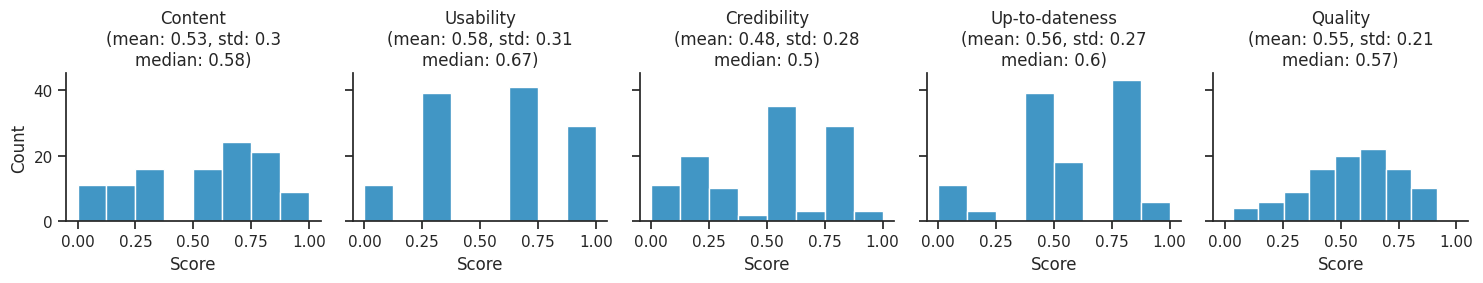

In [101]:
set_theme(
    style="ticks",
    palette="colorblind",
    font_scale=1.0,
    font="sans-serif",
)
plot = FacetGrid(
    df_plot,
    col="variable",
)
plot.map_dataframe(
    histplot,
    x="value",
)
plot.set_titles(template="{col_name}")
plot.set_xlabels(label="Score")
plot.savefig("../data/figures/quality-score-distributions.pdf")